In [ ]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
df_original = pd.read_csv("src/data/days_until_first_contract_and_price")
# #df_original = df_original[df_original["type"] == "Coleta/Entrega"]
# df_original = df_original[df_original["type"] == "Diária"]
df_original = df_original[df_original["week"] < 8]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_original = df_original.sort_values("week")
display(df_original.shape[0])

Nome do estudo: 7 - AHA! Moment - Otimização da taxa de retenção
Hash numérica de 5 dígitos: 05259
Execução em: 2025-05-05 16:27:40


7919

In [2]:
df = df_original.copy()

columns = ['total_contracts_until_week',
       'total_value_until_week', 'retention']
df[columns].head()

,total_contracts_until_week,total_value_until_week,retention
21279,1,780,1
21276,1,450,1
121,1,975,1
110,1,160,1
85,1,540,1


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df_original.copy()

# Supondo que df já esteja definido, por exemplo:
# df = pd.read_csv("seus_dados.csv")

# Seleciona as features para o PCA
features = ['total_contracts_until_week', 'total_value_until_week', 'retention']

# Padroniza os dados para que cada variável contribua de forma equivalente
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Aplica o PCA para reduzir a 1 componente principal
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_features)

# Adiciona uma nova coluna no df com o componente principal
df['PC1'] = principal_components

# Separar a coluna PC1 em 4 quartis e atribuir labels
df['PC1_quartile'] = pd.qcut(df['PC1'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

df_original = df.copy()

df = df.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].mean().reset_index()
display(df)


/tmp/ipykernel_78377/4026191801.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].mean().reset_index()


,PC1_quartile,week,total_contracts_until_week,total_value_until_week,retention
0,Q1,1.798485,1.673737,720.857071,0.203535
1,Q2,2.444052,2.436996,1418.539315,0.750000
2,Q3,3.828354,4.064304,3267.569620,0.767089
3,Q4,5.474242,6.916667,7422.771717,0.822727


/tmp/ipykernel_78377/1417399150.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('PC1_quartile').agg({


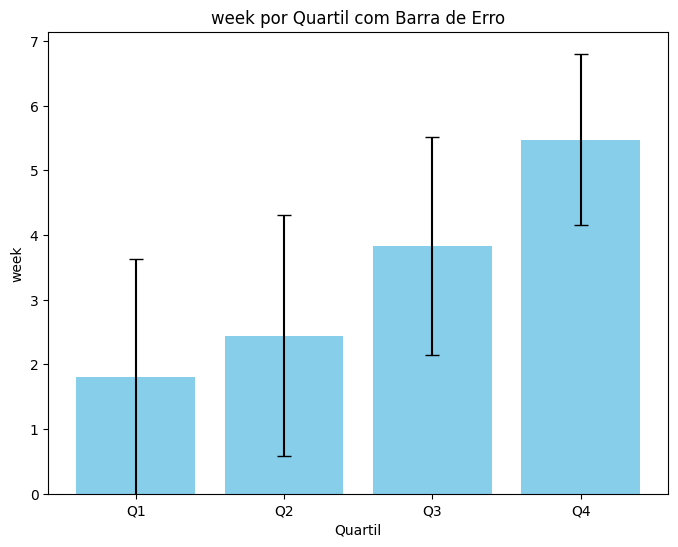

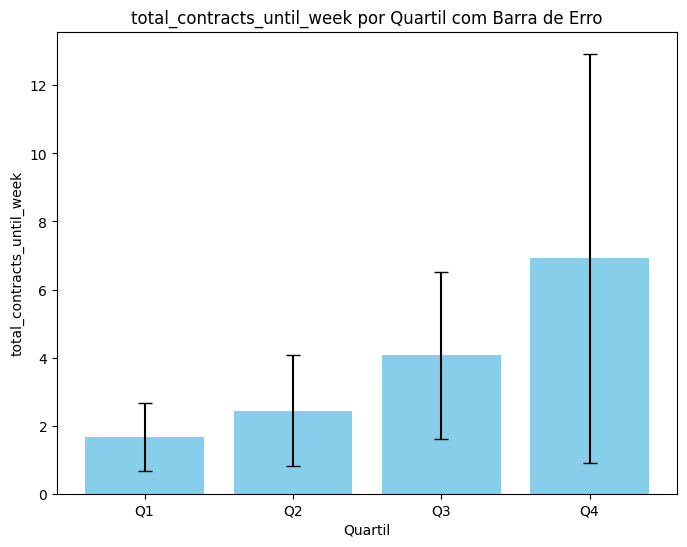

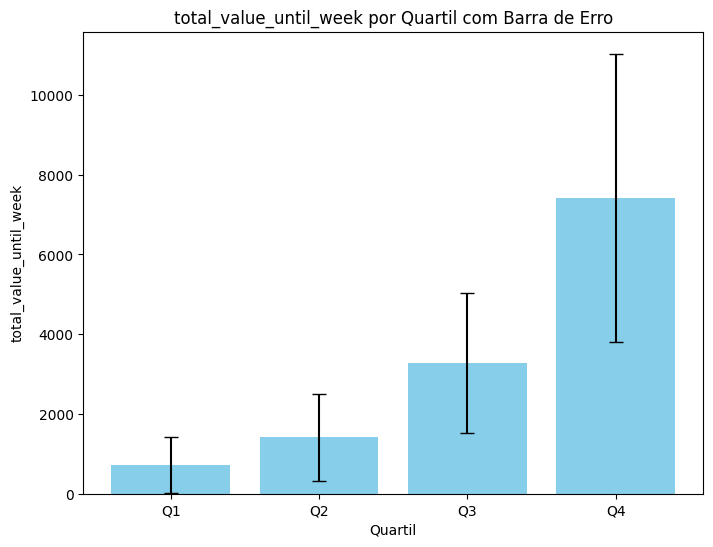

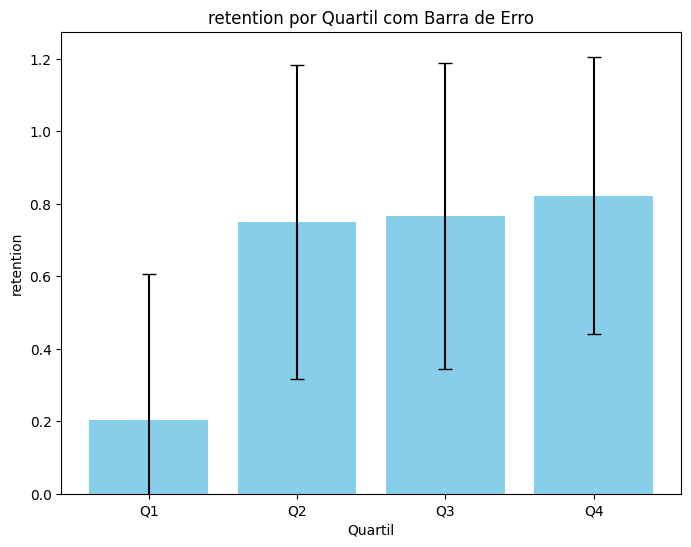

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_original.copy()

# Agrupa por quartil e calcula a média e o desvio padrão das variáveis
grouped = df.groupby('PC1_quartile').agg({
    'week': ['mean', 'std'],
    'total_contracts_until_week': ['mean', 'std'],
    'total_value_until_week': ['mean', 'std'],
    'retention': ['mean', 'std']
}).reset_index()

# Lista das variáveis a serem plotadas
variaveis = ['week', 'total_contracts_until_week', 'total_value_until_week', 'retention']

# Para cada variável, gera um gráfico de barras com os quartis no eixo x e as barras de erro
for var in variaveis:
    plt.figure(figsize=(8, 6))
    plt.bar(grouped['PC1_quartile'], grouped[(var, 'mean')],
            yerr=grouped[(var, 'std')], capsize=5, color='skyblue')
    plt.title(f'{var} por Quartil com Barra de Erro')
    plt.xlabel('Quartil')
    plt.ylabel(var)
    plt.ylim(bottom=0)  # Garante que o eixo y comece em 0
    plt.show()


/tmp/ipykernel_78377/1703605218.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stats = df_stats.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].agg(['mean', 'std']).reset_index()


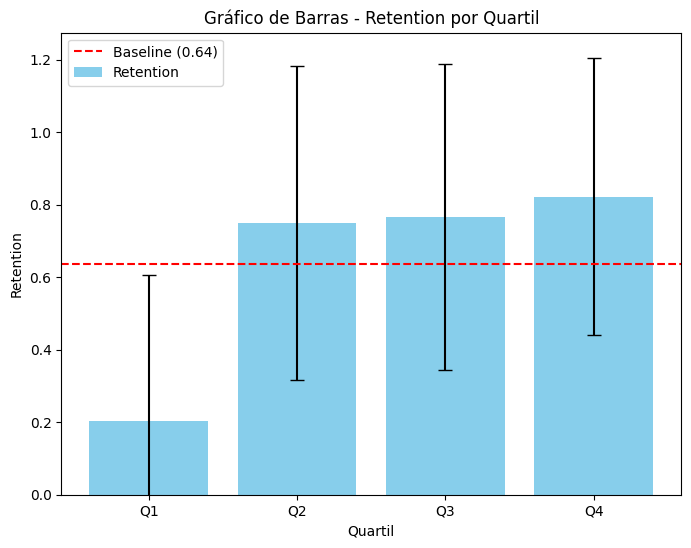

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Copia o DataFrame original e agrupa por PC1_quartile, calculando média e desvio padrão para cada variável
df_stats = df_original.copy()
df_stats = df_stats.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].agg(['mean', 'std']).reset_index()

# Define a baseline; nesse exemplo, usamos a média dos valores de retention
baseline = df_stats[('retention', 'mean')].mean()

plt.figure(figsize=(8, 6))
plt.bar(df_stats['PC1_quartile'], df_stats[('retention', 'mean')], 
        yerr=df_stats[('retention', 'std')], capsize=5, color='skyblue', label='Retention')
plt.axhline(baseline, color='red', linestyle='--', label=f'Baseline ({baseline:.2f})')
plt.title('Gráfico de Barras - Retention por Quartil')
plt.xlabel('Quartil')
plt.ylabel('Retention')
plt.ylim(bottom=0)  # Garante que o eixo y comece em 0
plt.legend()
plt.show()


In [6]:
df = df_original.copy()
baseline_retention = 0 
baseline_retention = df.drop_duplicates("driver_id")["retention"].mean()
print(f"Baseline Retenção: {baseline_retention}")

Baseline Retenção: 0.6193574623830825


/tmp/ipykernel_78377/1638068097.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].agg(['mean', 'std', 'count'])
/tmp/ipykernel_78377/1638068097.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quartile_value = str(row['PC1_quartile'][0])


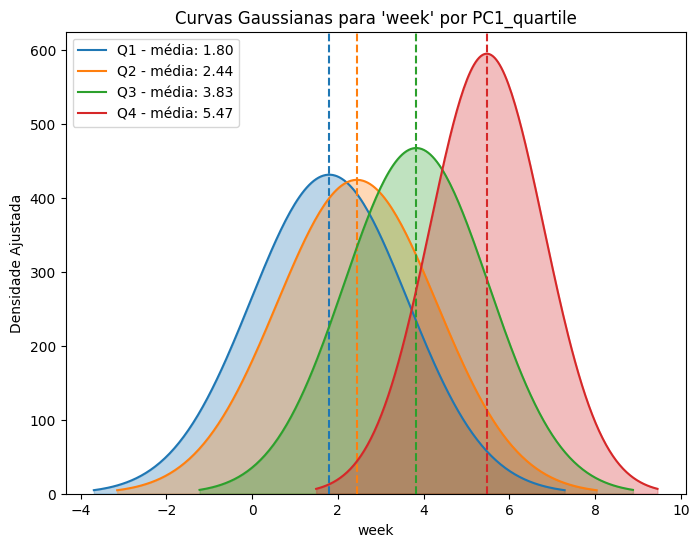

/tmp/ipykernel_78377/1638068097.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quartile_value = str(row['PC1_quartile'][0])


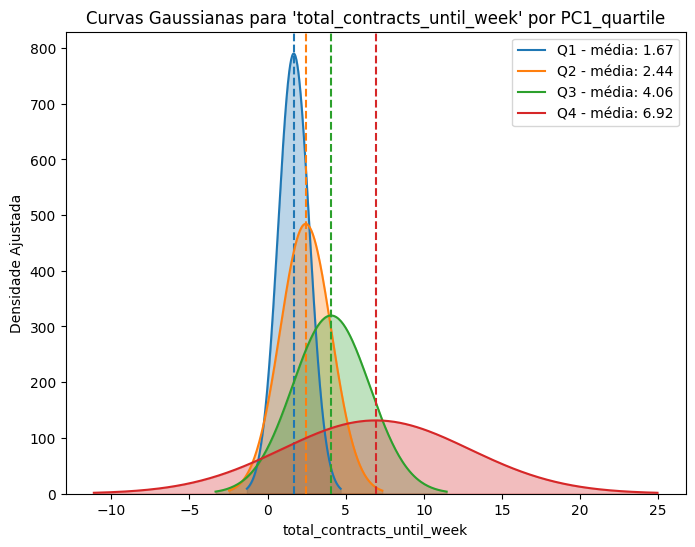

/tmp/ipykernel_78377/1638068097.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quartile_value = str(row['PC1_quartile'][0])


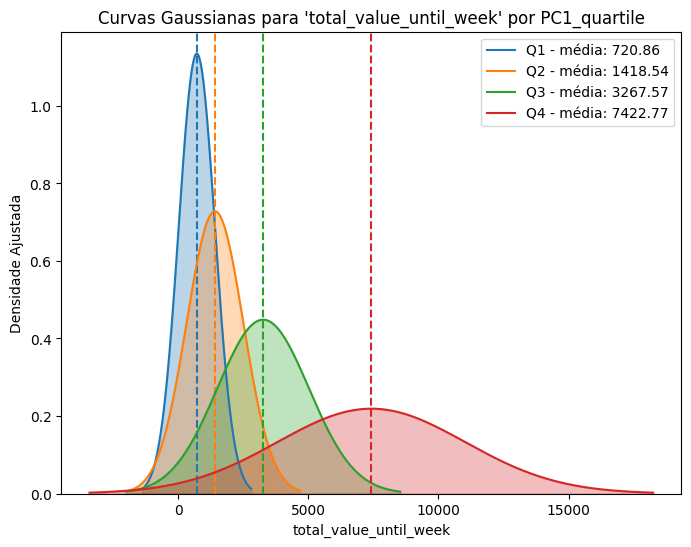

/tmp/ipykernel_78377/1638068097.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quartile_value = str(row['PC1_quartile'][0])


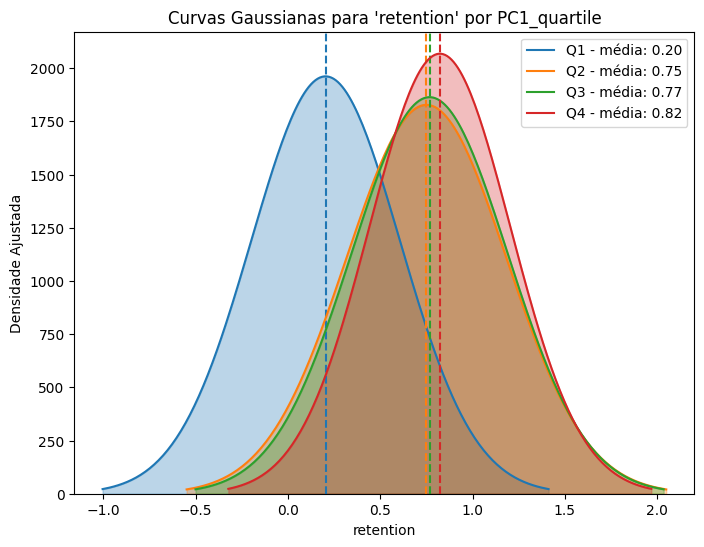

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo: carregando ou definindo o DataFrame (substitua pela sua fonte de dados)
# df = pd.read_csv("seus_dados.csv")

df = df_original.copy()

# Agrupa os dados por 'PC1_quartile' e calcula a média, o desvio padrão e o count para as variáveis
stats = df.groupby("PC1_quartile")[["week", "total_contracts_until_week", "total_value_until_week", "retention"]].agg(['mean', 'std', 'count'])
stats = stats.reset_index()

# Lista de variáveis que serão plotadas
variaveis = ["week", "total_contracts_until_week", "total_value_until_week", "retention"]

# Para cada variável, cria um gráfico com as curvas gaussianas para cada quartil
for var in variaveis:
    plt.figure(figsize=(8, 6))
    
    # Itera sobre cada grupo (quartil)
    for idx, row in stats.iterrows():
        mu = row[(var, 'mean')]
        sigma = row[(var, 'std')]
        n = row[(var, 'count')]
        
        # Se sigma for zero, evita divisão por zero
        if sigma == 0:
            sigma = 1e-6

        # Define um range de x em torno da média (±3 sigma)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
        
        # Calcula a gaussiana multiplicada pelo número de registros
        y = (n / (sigma * np.sqrt(2*np.pi))) * np.exp(-((x - mu)**2) / (2*sigma**2))
        
        # Extrai o valor do quartil e converte para string (evitando metadados no label)
        quartile_value = str(row['PC1_quartile'][0])
        
        # Ajuste o rótulo para ficar mais limpo
        label = f"{quartile_value} - média: {mu:.2f}"
        
        # Plota a curva
        line, = plt.plot(x, y, label=label)
        # Adiciona o preenchimento sob a curva
        plt.fill_between(x, y, alpha=0.3, color=line.get_color())
        # Adiciona linha vertical tracejada na posição da média
        plt.axvline(mu, color=line.get_color(), linestyle='--')
    
    plt.title(f"Curvas Gaussianas para '{var}' por PC1_quartile")
    plt.xlabel(var)
    plt.ylabel("Densidade Ajustada")
    plt.ylim(bottom=0)  # Ajusta o limite inferior do eixo y para 0
    plt.legend()
    plt.show()
